Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [55]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Loads and read files

In [56]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_train.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/titanic_test.csv')
#Reading gender file:
gender_file = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Titanic-Datasets/master/gender_submission.csv')

In [57]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [59]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [63]:
gender_file

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Drop columns

In [64]:
ID_train = train.PassengerId
ID_test = test.PassengerId

train = train.drop(['PassengerId','Cabin', 'Ticket'], axis=1)
test = test.drop(['PassengerId','Cabin', 'Ticket'], axis=1)

In [65]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


Check for null values

In [66]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [67]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Replace null values

In [68]:
train["Age"] = train["Age"].fillna(train['Age'].median())
test["Age"] = test["Age"].fillna(test['Age'].median())

In [69]:
train["Embarked"] = train["Embarked"].fillna(train['Embarked'].mode()[0])

In [70]:
test["Fare"] = test["Fare"].fillna(test['Fare'].median())

Convert Age and Fare to integar

In [71]:
train.Age = train.Age.astype(int)
test.Age = test.Age.astype(int)

train.Fare = train.Fare.astype(int)
test.Fare = test.Fare.astype(int)

In [72]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,13,S
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,30,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,23,S
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,30,C


In [73]:
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34,0,0,7,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,7,S
2,2,"Myles, Mr. Thomas Francis",male,62,0,0,9,Q
3,3,"Wirz, Mr. Albert",male,27,0,0,8,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,12,S
...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,27,0,0,8,S
414,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,108,C
415,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,7,S
416,3,"Ware, Mr. Frederick",male,27,0,0,8,S


In [74]:
train.Age.isnull().sum().sum(), test.Age.isnull().sum().sum()

(0, 0)

Preprocess the data

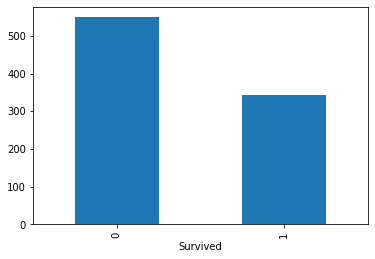

In [75]:
train.groupby('Survived').Survived.count().plot.bar(ylim=0)
plt.show()

In [76]:
#take title from name
train['Title'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
test['Title'] = test['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [77]:
title=train.groupby('Title')['Survived'].sum().reset_index()
title

,Title,Survived
0,Capt,0
1,Col,1
2,Don,0
3,Dr,3
4,Jonkheer,0
5,Lady,1
6,Major,1
7,Master,23
8,Miss,127
9,Mlle,2


In [78]:
title1={'Capt':1, 'Col':2, 'Don':3, 'Dr':4,'Jonkheer':5, 'Lady':6, 'Major': 7, 'Master':8, 'Miss':9, 
        'Mlle':10, 'Mme':11, 'Mr':12, 'Mrs':13, 'Ms':14, 'Rev':15, 'Sir':16, 'the Countess':17, 'Dona':18}
train.Title=train.Title.map(title1)
test.Title=test.Title.map(title1)

In [79]:
title2=train.groupby('Title')['Survived'].sum().reset_index()
title2

,Title,Survived
0,1,0
1,2,1
2,3,0
3,4,3
4,5,0
5,6,1
6,7,1
7,8,23
8,9,127
9,10,2


In [80]:
train['Title'].isnull().sum().sum(), test['Title'].isnull().sum().sum()

(0, 0)

In [81]:
pclass=train.groupby('Pclass')['Survived'].sum().reset_index()
pclass

,Pclass,Survived
0,1,136
1,2,87
2,3,119


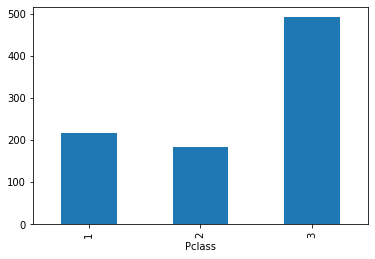

In [82]:
train.groupby('Pclass').Survived.count().plot.bar(ylim=0)
plt.show()

In [83]:
train['Pclass'].isnull().sum().sum(), test['Pclass'].isnull().sum().sum()

(0, 0)

In [84]:
sex=train.groupby('Sex')['Survived'].sum().reset_index()
sex

,Sex,Survived
0,female,233
1,male,109


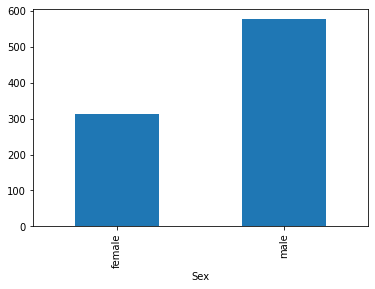

In [85]:
train.groupby('Sex').Survived.count().plot.bar(ylim=0)
plt.show()

In [86]:
sex1={'male':1, 'female':2}
train.Sex=train.Sex.map(sex1)
test.Sex=test.Sex.map(sex1)

In [87]:
sex2=train.groupby('Sex')['Survived'].sum().reset_index()
sex2

,Sex,Survived
0,1,109
1,2,233


In [88]:
age=train.groupby('Age')['Survived'].sum().reset_index()
age

,Age,Survived
0,0,7
1,1,5
2,2,3
3,3,5
4,4,7
...,...,...
66,66,0
67,70,0
68,71,0
69,74,0


In [89]:
train['Family'] = train.SibSp + train.Parch
test['Family'] = test.SibSp + test.Parch
train.Family.sum(), test.Family.sum()

(806, 351)

In [90]:
family=train.groupby('Family')['Survived'].sum().reset_index()
family

,Family,Survived
0,0,163
1,1,89
2,2,59
3,3,21
4,4,3
5,5,3
6,6,4
7,7,0
8,10,0


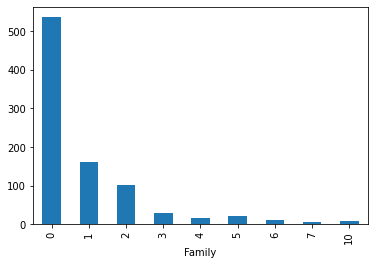

In [91]:
train.groupby('Family').Survived.count().plot.bar(ylim=0)
plt.show()

In [92]:
fare=train.groupby('Fare')['Survived'].sum().reset_index()
fare

,Fare,Survived
0,0,1
1,4,0
2,5,0
3,6,1
4,7,50
...,...,...
86,227,3
87,247,1
88,262,2
89,263,2


In [93]:
embark=train.groupby('Embarked')['Survived'].sum().reset_index()
embark

,Embarked,Survived
0,C,93
1,Q,30
2,S,219


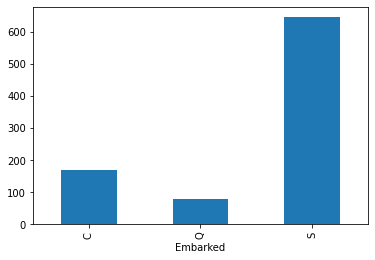

In [94]:
train.groupby('Embarked').Survived.count().plot.bar(ylim=0)
plt.show()

In [95]:
#convert letters to numbers
letters = train.Embarked
numbers = []
for letter in letters:
  number = ord(letter)
  numbers.append(number)
print(numbers)
train.Embarked = numbers
train.Embarked


[83, 67, 83, 83, 83, 81, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 81, 83, 83, 83, 67, 83, 81, 83, 67, 67, 81, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 67, 81, 83, 81, 81, 67, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 83, 67, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 67, 83, 83, 67, 83, 81, 83, 67, 83, 83, 83, 67, 83, 83, 67, 81, 83, 67, 83, 67, 83, 83, 83, 83, 67, 83, 83, 83, 67, 67, 83, 83, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 67, 83, 83, 83, 67, 83, 83, 83, 83, 81, 83, 81, 83, 83, 83, 83, 83, 67, 67, 81, 83, 81, 83, 83, 83, 83, 67, 83, 83, 83, 67, 81, 67, 83, 83, 83, 83, 81, 67, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 67, 81, 83, 83, 67, 81, 83, 83, 83, 83,

0      83
1      67
2      83
3      83
4      83
       ..
886    83
887    83
888    83
889    67
890    81
Name: Embarked, Length: 891, dtype: int64

In [96]:
#convert letters to numbers
letters = test.Embarked
numbers = []
for letter in letters:
  number = ord(letter)
  numbers.append(number)
print(numbers)
test.Embarked = numbers
test.Embarked


[81, 83, 81, 83, 83, 83, 81, 83, 67, 83, 83, 83, 83, 83, 83, 67, 81, 67, 83, 67, 67, 83, 83, 67, 67, 83, 67, 67, 83, 67, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 67, 81, 67, 83, 83, 67, 83, 83, 67, 81, 83, 83, 83, 67, 83, 83, 83, 81, 67, 83, 81, 83, 67, 83, 81, 83, 83, 67, 67, 67, 83, 83, 83, 81, 67, 83, 83, 83, 81, 67, 81, 83, 81, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 67, 83, 81, 83, 67, 83, 81, 81, 83, 83, 67, 81, 67, 81, 83, 67, 67, 83, 67, 83, 83, 81, 67, 83, 81, 83, 83, 81, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 83, 83, 83, 83, 67, 83, 83, 83, 83, 83, 83, 83, 67, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 67, 83, 83, 83, 83, 67, 83, 67, 83, 83, 67, 83, 67, 83, 83, 83, 67, 83, 67, 83, 67, 83, 81, 67, 83, 83, 83, 83, 83, 83, 83, 83, 81, 83, 83, 67, 83, 83, 83, 81, 83, 67, 83, 83, 67, 81, 83, 67, 83, 83, 83, 83, 83, 83, 83, 81, 83, 67, 83, 67, 83, 83, 83, 67, 67, 83, 81, 83, 83, 83, 83, 83, 81, 67, 83, 67, 67, 83, 67, 67, 83, 67, 83, 83, 83, 83, 83, 83, 67,

0      81
1      83
2      81
3      83
4      83
       ..
413    83
414    67
415    83
416    83
417    67
Name: Embarked, Length: 418, dtype: int64

Set up X and y values

In [97]:
y = train["Survived"]
features = ["Pclass", "Sex", "Family", "Embarked", "Title", "Age", "Fare"]
X = train[features]
X_test = test[features]

Split the training file for training and testing

In [98]:
#split train set for testing
rows = 800
X_train = X[:rows]
X_val = X[rows:]

y_train = y[:rows]
y_val = y[rows:]

X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((800, 7), (91, 7), (800,), (91,), (418, 7))

Select model

Logistic Regression

In [99]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

In [100]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [101]:
def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        # Print log-likelihood every so often
        if step % 10000 == 0:
            print (log_likelihood(features, target, weights))
    return weights

In [102]:
xrange = range

weights = logistic_regression(X_train, y_train,
                     num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-9422.173555491983
-40028.54664075891
-5085.0648985711005
-5061.224459242723
-3874.977062539342
-3762.4039853197455
-4945.289726912841
-4110.685840795681
-5491.247053994798
-5224.3116489982585
-5492.1014221214755
-5042.807215785875
-3714.585641438266
-3817.5941226345794
-4078.2386098631678
-4040.6164987825136
-4966.134395599016
-4145.9844654254575
-4596.577885191569
-4690.299647161892
-7416.130031817378
-8659.593207077825
-6192.826886779606
-4737.346827660548
-3885.9310211183997
-4482.749117188252
-9332.254220327177
-14308.510840755856
-7534.01557096432
-8886.155557351254


Predict on training set

In [103]:
data_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)),X_train))
score = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(score))
preds = preds.astype(int)

print ('Accuracy from scratch: {0}'.format((preds == y_train).sum().astype(float) / len(preds)))

Accuracy from scratch: 0.76375


Predict on validation set

In [104]:
data_with_intercept = np.hstack((np.ones((X_val.shape[0], 1)),X_val))
score = np.dot(data_with_intercept, weights)
y_pred = np.round(sigmoid(score))
y_pred = y_pred.astype(int)

print ('Accuracy from scratch: {0}'.format((y_pred == y_val).sum().astype(float) / len(y_pred)))

Accuracy from scratch: 0.8131868131868132


In [105]:
df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred})
df

,Actual,Predicted
800,0,0
801,1,0
802,1,1
803,1,0
804,1,0
...,...,...
886,0,0
887,1,1
888,0,0
889,1,0


Predict on test set

In [106]:
data_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)),X_test))
score = np.dot(data_with_intercept, weights)
prediction = np.round(sigmoid(score))
prediction = prediction.astype(int)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [107]:
output = pd.DataFrame({'PassengerId': ID_test, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Submit predictions

In [108]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
